In [1]:
# Task 1: Retrieving and Preparing the Data
# "we will start by loading the CSV data from the file (using appropriate pandas functions) and checking whether the loaded data is equivalent to the data in the source CSV file.
# And then combining all the 15 CSV Files together.
# Then, we need to clean the data by using the techniques and functions taught in the lectures.
# we need to deal with all the potential issues/errors in the data appropriately (such as: typos, extra whitespaces, sanity checks for impossible values, and missing values etc).

# DATASET-1 :- Activity Recognition from single chest-mounted accelerometer Data set.

In [2]:
import numpy as np #imports numpy package into memory and give it a nickname as np
import pandas as pd #imports pandas package into memory and give it a nickname as pd
import matplotlib.pyplot as plt #imports matplot library to show and use some plot function of it for further analysis.
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# Define variables df1, df2,.... df15 and assign to it the appropriate value returned by pd.read_csv fuction from pandas to read our csv with sepecific parameters.

df1 =pd.read_csv("1.csv",encoding='unicode_escape',error_bad_lines=False ,names=['Sequential Number','X acceleration','Y acceleration','Z acceleration','Label'])
df2 =pd.read_csv("2.csv",encoding='unicode_escape',error_bad_lines=False,names=['Sequential Number','X acceleration','Y acceleration','Z acceleration','Label'])
df3 =pd.read_csv("3.csv",encoding='unicode_escape',error_bad_lines=False ,names=['Sequential Number','X acceleration','Y acceleration','Z acceleration','Label'])
df4 =pd.read_csv("4.csv",encoding='unicode_escape',error_bad_lines=False,names=['Sequential Number','X acceleration','Y acceleration','Z acceleration','Label'])
df5 =pd.read_csv("5.csv",encoding='unicode_escape',error_bad_lines=False ,names=['Sequential Number','X acceleration','Y acceleration','Z acceleration','Label'])
df6 =pd.read_csv("6.csv",encoding='unicode_escape',error_bad_lines=False,names=['Sequential Number','X acceleration','Y acceleration','Z acceleration','Label'])
df7 =pd.read_csv("7.csv",encoding='unicode_escape',error_bad_lines=False ,names=['Sequential Number','X acceleration','Y acceleration','Z acceleration','Label'])
df8 =pd.read_csv("8.csv",encoding='unicode_escape',error_bad_lines=False,names=['Sequential Number','X acceleration','Y acceleration','Z acceleration','Label'])
df9 =pd.read_csv("9.csv",encoding='unicode_escape',error_bad_lines=False ,names=['Sequential Number','X acceleration','Y acceleration','Z acceleration','Label'])
df10 =pd.read_csv("10.csv",encoding='unicode_escape',error_bad_lines=False,names=['Sequential Number','X acceleration','Y acceleration','Z acceleration','Label'])
df11 =pd.read_csv("11.csv",encoding='unicode_escape',error_bad_lines=False ,names=['Sequential Number','X acceleration','Y acceleration','Z acceleration','Label'])
df12 =pd.read_csv("12.csv",encoding='unicode_escape',error_bad_lines=False,names=['Sequential Number','X acceleration','Y acceleration','Z acceleration','Label'])
df13 =pd.read_csv("13.csv",encoding='unicode_escape',error_bad_lines=False ,names=['Sequential Number','X acceleration','Y acceleration','Z acceleration','Label'])
df14 =pd.read_csv("14.csv",encoding='unicode_escape',error_bad_lines=False,names=['Sequential Number','X acceleration','Y acceleration','Z acceleration','Label'])
df15 =pd.read_csv("15.csv",encoding='unicode_escape',error_bad_lines=False ,names=['Sequential Number','X acceleration','Y acceleration','Z acceleration','Label'])


In [4]:
#Concat function takes all the 15 datasets and combines into one named data.
data =pd.concat( [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15] ,axis=0)


In [5]:
data

,Sequential Number,X acceleration,Y acceleration,Z acceleration,Label
0,0.0,1502,2215,2153,1
1,1.0,1667,2072,2047,1
2,2.0,1611,1957,1906,1
3,3.0,1601,1939,1831,1
4,4.0,1643,1965,1879,1
...,...,...,...,...,...
103496,103500.0,2043,2539,1990,7
103497,103500.0,2036,2508,1976,7
103498,103500.0,2025,2520,1991,7
103499,103500.0,2009,2546,2007,7


In [6]:
#checking the data types to see whether they are appropriately defined.
data.dtypes

Sequential Number    float64
X acceleration         int64
Y acceleration         int64
Z acceleration         int64
Label                  int64
dtype: object

In [7]:
#Checking whether there are null values or not. And we can see there are no null values.
data.isnull().sum()

Sequential Number    0
X acceleration       0
Y acceleration       0
Z acceleration       0
Label                0
dtype: int64

In [8]:
# Checking the unique value counts and we can see there exists a value 0 for label that is impossible value. so we will remove those entries.
data['Label'].value_counts()

1    608667
7    593563
4    357064
3    216737
5     51498
2     47878
6     47770
0      3719
Name: Label, dtype: int64

In [9]:
# Removed enteries having label = 0 
data=data[data.Label > 0]

In [10]:
data['Label'].value_counts()

1    608667
7    593563
4    357064
3    216737
5     51498
2     47878
6     47770
Name: Label, dtype: int64

In [11]:
len(data)

1923177

In [12]:
# Task 2: Data Exploration

# Explore each colum.
# Explore the relationship between all pair of attributes.

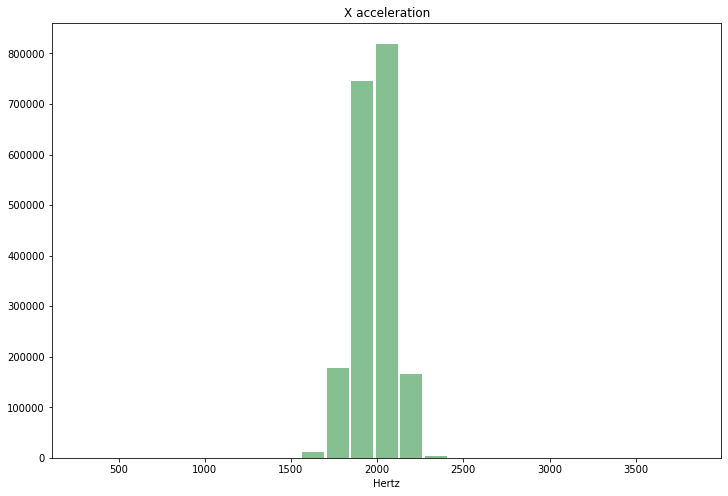

count    1.923177e+06
mean     1.987479e+03
std      1.113408e+02
min      2.820000e+02
25%      1.904000e+03
50%      1.992000e+03
75%      2.076000e+03
max      3.828000e+03
Name: X acceleration, dtype: float64

In [13]:
# Plotted the histogram to see whether data X acceleration is normally distributed or not and to find the descriptive statistics of it.

data.hist(column='X acceleration', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
#data['X acceleration'].plot(kind='hist', by=data['Label'])        
plt.title('X acceleration')        
plt.xlabel('Hertz')       
plt.show()
data['X acceleration'].describe()

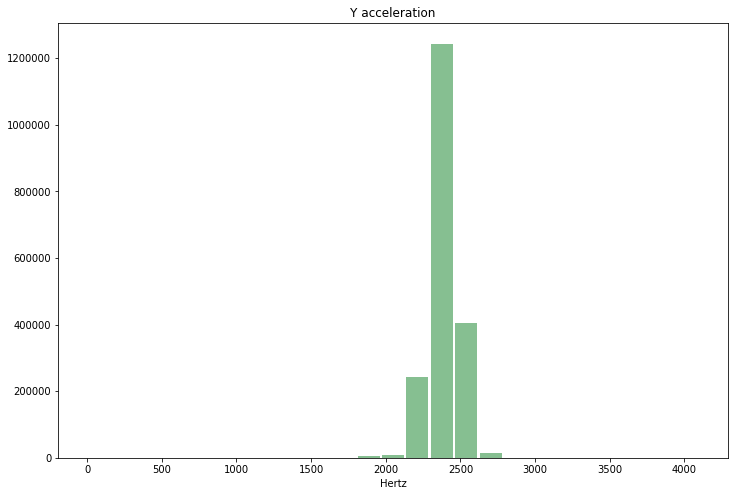

count    1.923177e+06
mean     2.382300e+03
std      1.002107e+02
min      2.000000e+00
25%      2.337000e+03
50%      2.367000e+03
75%      2.412000e+03
max      4.095000e+03
Name: Y acceleration, dtype: float64

In [14]:
# Plotted the histogram to see whether data Y acceleration is normally distributed or not and to find the descriptive statistics of it.

data.hist(column='Y acceleration', bins=25, grid=False, figsize=(12,8), color='#86bf91', rwidth=0.9)
#data['Y acceleration'].plot(kind='hist')        
plt.title('Y acceleration')        
plt.xlabel('Hertz')       
plt.show()
data['Y acceleration'].describe()

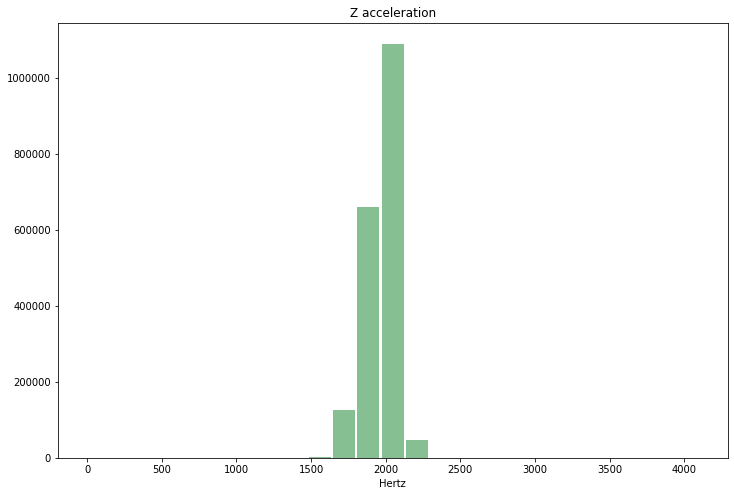

count    1.923177e+06
mean     1.970488e+03
std      9.449121e+01
min      1.000000e+00
25%      1.918000e+03
50%      1.988000e+03
75%      2.032000e+03
max      4.095000e+03
Name: Z acceleration, dtype: float64

In [15]:
# Plotted the histogram to see whether data Z acceleration is normally distributed or not and to find the descriptive statistics of it.

data.hist(column='Z acceleration', bins=25, grid=False, figsize=(12,8), color='#86bf91', rwidth=0.9)
#data['Z acceleration'].plot(kind='hist')        
plt.title('Z acceleration')        
plt.xlabel('Hertz')       
plt.show()
data['Z acceleration'].describe()

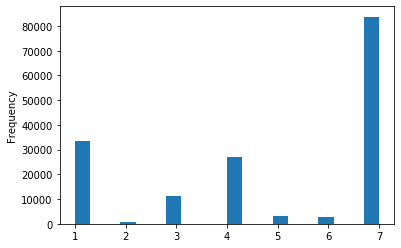

In [16]:
#Exploring the 1st person label frequency.
#Removing the label 0 
df1=df1[df1.Label != 0]
df1['Label'].plot(kind='hist', bins=20)

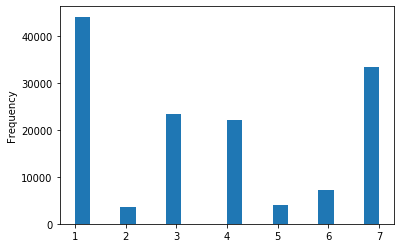

In [17]:
#Exploring the 2nd person label frequency.
#Removing the label 0 
df2=df2[df2.Label != 0]

df2['Label'].plot(kind='hist', bins=20)

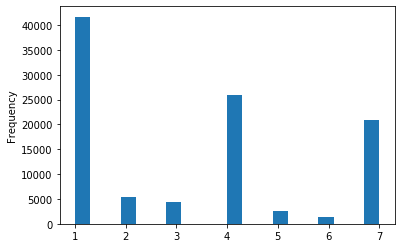

In [18]:
#Exploring the 3rd person label frequency.
#Removing the label 0 
df3=df3[df3.Label != 0]

df3['Label'].plot(kind='hist', bins=20)

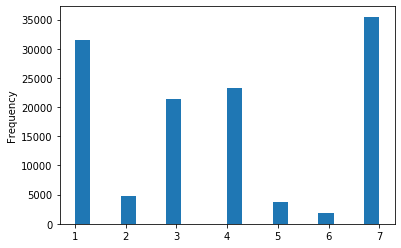

In [19]:
#Exploring the 4th person label frequency.
#Removing the label 0 
df4=df4[df4.Label != 0]

df4['Label'].plot(kind='hist', bins=20)

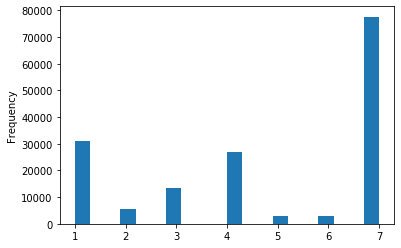

In [20]:
#Exploring the 5th person label frequency.
#Removing the label 0 
df5=df5[df5.Label != 0]

df5['Label'].plot(kind='hist', bins=20)

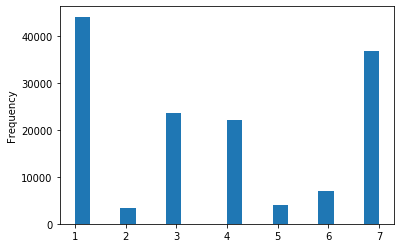

In [21]:
#Exploring the 6th person label frequency.
#Removing the label 0 
df6=df6[df6.Label != 0]

df6['Label'].plot(kind='hist', bins=20)

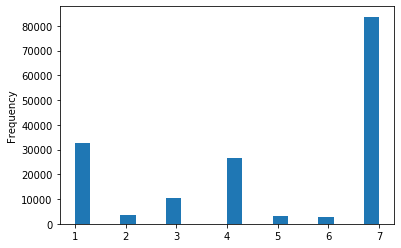

In [22]:
#Exploring the 7th person label frequency.
#Removing the label 0 
df7=df7[df7.Label != 0]

df7['Label'].plot(kind='hist', bins=20)

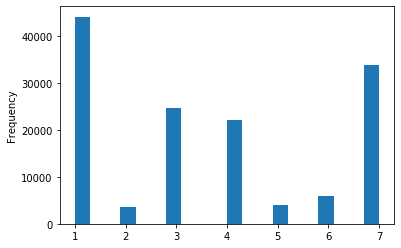

In [23]:
#Exploring the 8th person label frequency.
#Removing the label 0 
df8=df8[df8.Label != 0]

df8['Label'].plot(kind='hist', bins=20)

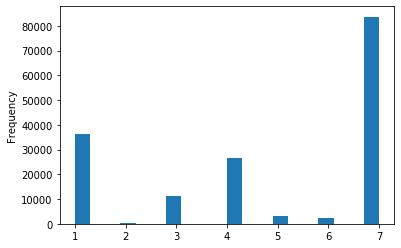

In [24]:
#Exploring the 9th person label frequency.
#Removing the label 0 
df9=df9[df9.Label != 0]

df9['Label'].plot(kind='hist', bins=20)

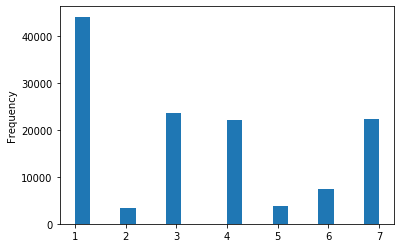

In [25]:
#Exploring the 10th person label frequency.
#Removing the label 0 
df10=df10[df10.Label != 0]

df10['Label'].plot(kind='hist', bins=20)

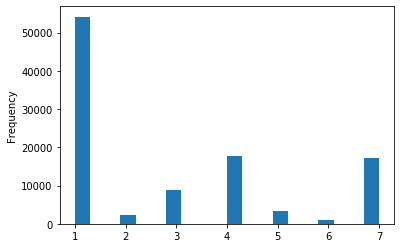

In [26]:
#Exploring the 11th person label frequency.
#Removing the label 0 
df11=df11[df11.Label != 0]

df11['Label'].plot(kind='hist', bins=20)

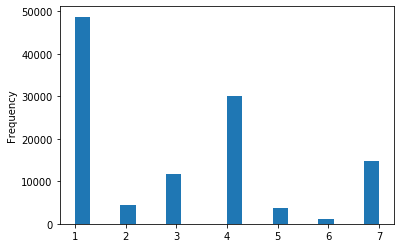

In [27]:
#Exploring the 12th person label frequency.
#Removing the label 0 
df12=df12[df12.Label != 0]

df12['Label'].plot(kind='hist', bins=20)

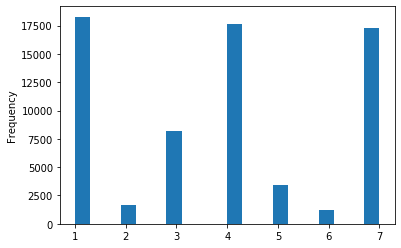

In [28]:
#Exploring the 13th person label frequency.
#Removing the label 0 
df13=df13[df13.Label != 0]

df13['Label'].plot(kind='hist', bins=20)

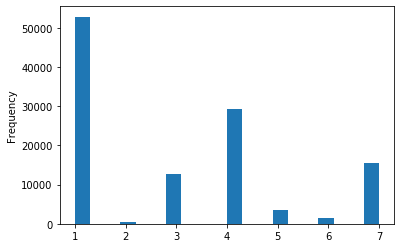

In [29]:
#Exploring the 14th person label frequency.
#Removing the label 0 
df14=df14[df14.Label != 0]

df14['Label'].plot(kind='hist', bins=20)

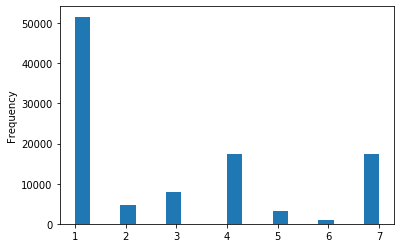

In [30]:
#Exploring the 15th person label frequency.
#Removing the label 0 
df15=df15[df15.Label != 0]

df15['Label'].plot(kind='hist', bins=20)

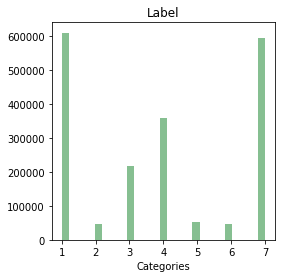

count    1.923177e+06
mean     3.890407e+00
std      2.439785e+00
min      1.000000e+00
25%      1.000000e+00
50%      4.000000e+00
75%      7.000000e+00
max      7.000000e+00
Name: Label, dtype: float64

In [31]:

data.hist(column='Label', bins=25, grid=False, figsize=(4,4), color='#86bf91', rwidth=0.9)
plt.title('Label')        
plt.xlabel('Categories')       
plt.show()
data['Label'].describe()

In [32]:
# created a scatter_data frame and put all the X,Y,Z,Label into it to plot the scatter matrix for visualisation.
scatter_data= data[['X acceleration','Y acceleration','Z acceleration','Label']]
scatter_data

,X acceleration,Y acceleration,Z acceleration,Label
0,1502,2215,2153,1
1,1667,2072,2047,1
2,1611,1957,1906,1
3,1601,1939,1831,1
4,1643,1965,1879,1
...,...,...,...,...
103495,2050,2523,1991,7
103496,2043,2539,1990,7
103497,2036,2508,1976,7
103498,2025,2520,1991,7


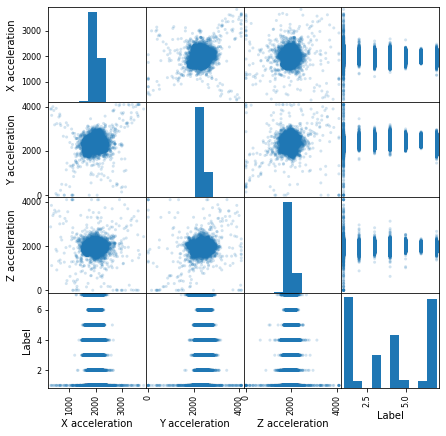

In [33]:
#A scatter matrix (pairs plot) compactly plots all the numeric variables we have in a dataset against each other one. 
#In Python, this data visualization technique can be carried out with many libraries but if we are using Pandas to load the data.
#we can use the base scatter_matrix method to visualize the dataset.
# scatterplot to see the correlation either positive or negative.

from pandas.plotting import scatter_matrix
scatter_matrix(scatter_data,alpha=0.2,figsize=(7,7),diagonal='hist') 
plt.show() 


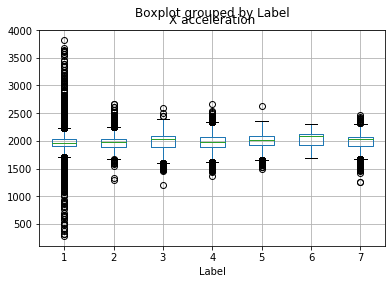

In [34]:
# Plotting a boxplot group by label for X acceleration.
# We can see that there are outliers in every label except the label 6. The mean of 2,4,5 is approximately equal,
# And 3,7 are also approximately equal.The mean is very high for 6.
data.boxplot(column='X acceleration', by='Label')
plt.show()


In [35]:
# Information printed out using the mean function for X acceleration grouped by Label
data.groupby('Label')['X acceleration'].mean()

Label
1    1977.689653
2    1969.489431
3    1996.272755
4    1976.819111
5    2000.554449
6    2027.107076
7    1997.845983
Name: X acceleration, dtype: float64

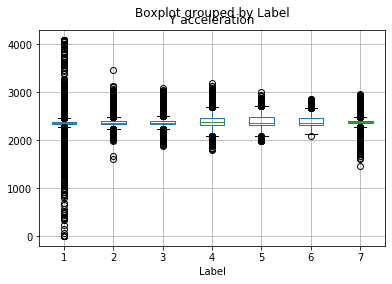

In [36]:
#Plotting a boxplot group by label for Y acceleration.
data.boxplot(column='Y acceleration', by='Label')
plt.show()

In [37]:
# Information printed out using the mean function for Y acceleration grouped by Label
data.groupby('Label')['Y acceleration'].mean()

Label
1    2376.558532
2    2371.051965
3    2378.303095
4    2386.292905
5    2385.493844
6    2374.075277
7    2388.535898
Name: Y acceleration, dtype: float64

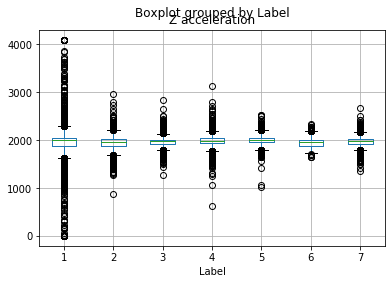

In [38]:
#Plotting a boxplot group by label for Z acceleration.
data.boxplot(column='Z acceleration', by='Label')
plt.show()

In [39]:
# Information printed out using the mean function for Z acceleration grouped by Label
data.groupby('Label')['Z acceleration'].mean()

Label
1    1966.415593
2    1940.448703
3    1965.729391
4    1978.708646
5    1997.001573
6    1952.189366
7    1973.053026
Name: Z acceleration, dtype: float64

In [40]:
#created three different datasets for comparing all the combinations of X,Y,Z by plotting the line graph.
compare1 = data[['X acceleration','Y acceleration']]
compare2 = data[['X acceleration','Z acceleration']]
compare3 = data[['Y acceleration','Z acceleration']]

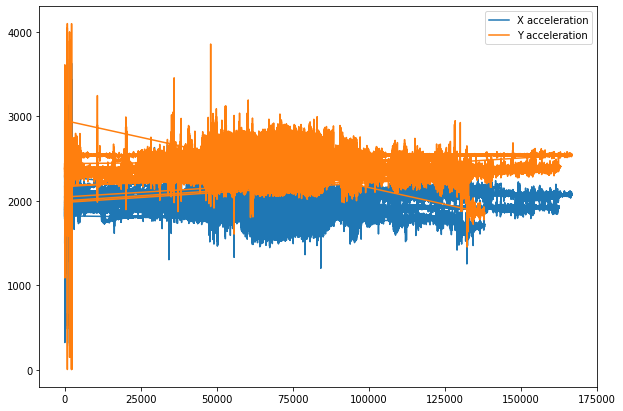

In [41]:
# plotting the line graph for X and Y acceleration. We can see that as the Frequency for X increases 
# the Y also increases in the similar fashion, and same goes for the decrease of X AND Y.
compare1.plot(legend=True, figsize=(10,7))

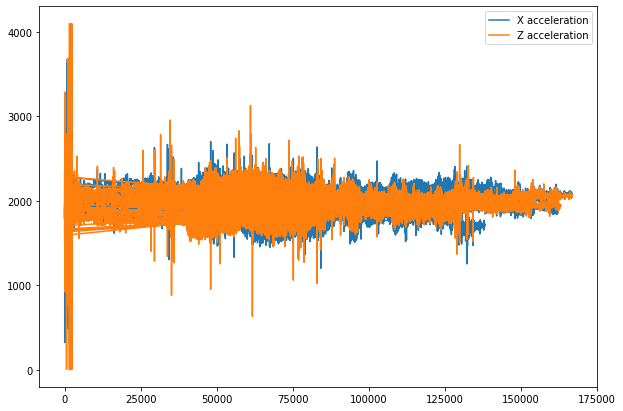

In [42]:
# plotting the line graph for X and Z acceleration. We can see that as the Frequency for X increases 
# the Z also increases in the similar fashion, and the values are approximately similar. 
# And same goes for the decrease of X AND Z.

compare2.plot(legend=True, figsize=(10,7))

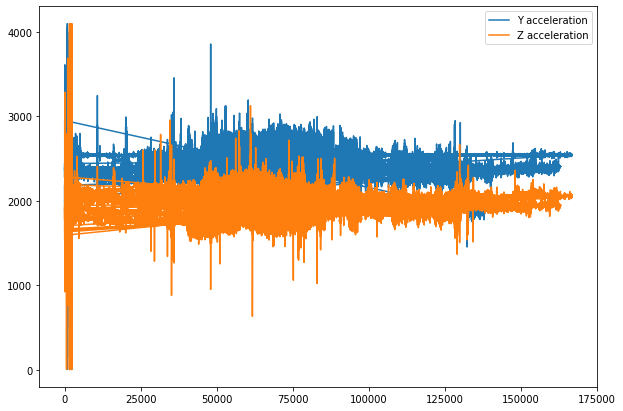

In [43]:
# plotting the line graph for Y and Z acceleration. We can see that as the Frequency for Y increases 
# the Z also increases in the similar WAY, and same goes for the decrease of Y AND Z.

compare3.plot(legend=True, figsize=(10,7))

In [44]:
# Sepearating the features and target for future use and analysis of the line graph of the features.

features=data[['X acceleration','Y acceleration','Z acceleration']]
target=data['Label']

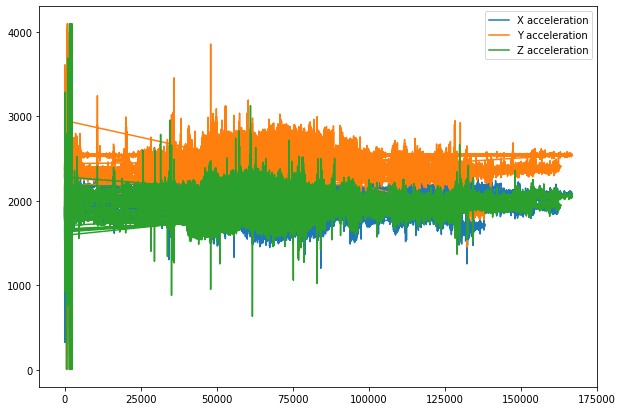

In [45]:
#plotting the line graph for features to understand and compare the x, y , z acceleration.
#This line graph compare all three features. From this graph we can see the Y acceleration line have the highest value of hertz due to the placement of the acceellerator.
#Most of the action in our targets require "standing up" as the first step. Therefore, Y axis will have an increase (standing up) as the first step.
#x and z values are not as high as y axis because the position of the accelerator. Z will likely to increase or decrease when a person is going up and down of the stairs. 
#x will likely to scale when a person is moving during sitting down and moving to another position. 

features.plot(legend=True, figsize=(10,7))

In [46]:
# Selected Classification models and used KNN Technique first.

X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.20,random_state = 4)
knn = KNeighborsClassifier(25, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)


In [47]:
fit=knn.fit(X_train, y_train)


In [48]:
y_pre=fit.predict(X_test)
y_pre

array([7, 7, 1, ..., 7, 7, 3])

#---------------Confusion Matrix--------------------#

In [50]:
cm = confusion_matrix(y_test,y_pre)

In [51]:
print(cm)

[[111164    681   1092   3648    104     53   5082]
 [  3753   1774    460   2073     41     19   1523]
 [  2285    173  20686   9690    676    451   9623]
 [  5071    191   3649  52831    237    224   8735]
 [   884     12   1951   4318   1183    138   1754]
 [   430     21   1148   1923    324   2003   3764]
 [  4735    195   4648   8262    209    947  99798]]


In [52]:
# We can see our accuracy after using confusion matrix for Knn model
print("[Train/test split] score: {:.4f}".format(knn.score(X_test, y_test)))

[Train/test split] score: 0.7525


In [53]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           1       0.87      0.91      0.89    121824
           2       0.58      0.18      0.28      9643
           3       0.62      0.47      0.54     43584
           4       0.64      0.74      0.69     70938
           5       0.43      0.12      0.18     10240
           6       0.52      0.21      0.30      9613
           7       0.77      0.84      0.80    118794

    accuracy                           0.75    384636
   macro avg       0.63      0.50      0.52    384636
weighted avg       0.74      0.75      0.74    384636



In [54]:
#---------------Cross validation step with KFlod for knn--------------------#

In [55]:
#set KFlod cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,random_state=19, shuffle=True)

#run the KFlod cross validation
for k, (train_index, test_index) in enumerate(kf.split(features)):
 
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
     
    knn.fit(X_train, y_train)
    print("[fold {0}] score: {1:.5f}".format(k, knn.score(X_test, y_test)))

[fold 0] score: 0.75086
[fold 1] score: 0.75240
[fold 2] score: 0.75262
[fold 3] score: 0.75204
[fold 4] score: 0.75336


In [56]:
# After model validation on KNN algorithm, we can see the accuracy according to 
# k-folds comes out to be 75.34% in fold 4.
# And confusion matrix comes out to be = 75.25%

In [57]:
# Selected Classification models and now using Decision Tree and then then compare which model is best.
model = DecisionTreeClassifier()
mod_Fit =model.fit(X_train, y_train)

In [58]:
y1_pre = mod_Fit.predict(X_test)

In [59]:
#---------------Cross validation step with KFlod for decision tree--------------------#

In [60]:
#set KFlod cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,random_state=19, shuffle=True)

#run the KFlod cross validation
for k, (train_index, test_index) in enumerate(kf.split(features)):
 
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
     
    model.fit(X_train, y_train)
    print("[fold {0}] score: {1:.5f}".format(k, model.score(X_test, y_test)))

[fold 0] score: 0.65690
[fold 1] score: 0.65878
[fold 2] score: 0.65836
[fold 3] score: 0.65932
[fold 4] score: 0.65906


In [61]:
#---------------Confusion Matrix--------------------#

In [4]:
cm1 = confusion_matrix(y_test, y1_pre)

NameError: name 'y_test' is not defined

In [63]:
# We can see what accuracy comes out by confusion matrix
print("[Train/test split] score: {:.4f}".format(model.score(X_test, y_test)))

[Train/test split] score: 0.6591


In [64]:
print(classification_report(y_test,y1_pre))

              precision    recall  f1-score   support

           1       0.84      0.86      0.85    121694
           2       0.22      0.21      0.22      9459
           3       0.42      0.45      0.43     43224
           4       0.57      0.55      0.56     71873
           5       0.17      0.17      0.17     10361
           6       0.23      0.23      0.23      9587
           7       0.73      0.71      0.72    118437

    accuracy                           0.66    384635
   macro avg       0.45      0.45      0.45    384635
weighted avg       0.66      0.66      0.66    384635



In [65]:
# After model validation on decision tree algorithm, we can see the accuracy according to 
# k-folds comes out to be 65.93% in fold 3.
# And confusion matrix comes out to be = 65.91%